In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# recent_data = np.loadtxt('../logs/log_pid_1686177622.csv',delimiter=',',dtype=float)
# recent_data = np.loadtxt('../logs/log_pid_1686179008.csv',delimiter=',',dtype=float)
# recent_data = np.loadtxt('../logs/log_pid_1686179926.csv',delimiter=',',dtyp10e=float)
pid_fixed = np.loadtxt('../logs/log_pid_1686200167.csv',delimiter=',',dtype=float)
pid_fixed[:, 0] -= pid_fixed[0, 0]

oo_fixed = np.loadtxt('../logs/log_io_1686200588.csv',delimiter=',',dtype=float)
oo_fixed[:, 0] -= oo_fixed[0, 0]

miac_fixed = np.loadtxt('../logs/log_miac_1686201624.csv',delimiter=',',dtype=float)
miac_fixed[:, 0] -= miac_fixed[0, 0]

mpc_fixed = np.loadtxt('../logs/log_mpc_1686202158.csv',delimiter=',',dtype=float)
mpc_fixed[:, 0] -= mpc_fixed[0, 0]

In [10]:
pid_variable = np.loadtxt('../logs/log_pid_1686203780.csv',delimiter=',',dtype=float)
pid_variable[:, 0] -= pid_variable[0, 0]

oo_variable = np.loadtxt('../logs/log_io_1686203140.csv',delimiter=',',dtype=float)
oo_variable[:, 0] -= oo_variable[0, 0]

miac_variable = np.loadtxt('../logs/log_miac_1686204217.csv',delimiter=',',dtype=float)
miac_variable[:, 0] -= miac_variable[0, 0]

mpc_variable = np.loadtxt('../logs/log_mpc_1686204839.csv',delimiter=',',dtype=float)
mpc_variable[:, 0] -= mpc_variable[0, 0]

In [6]:
from matplotlib import rc

# Use TeX for text rendering
rc('text', usetex=True)

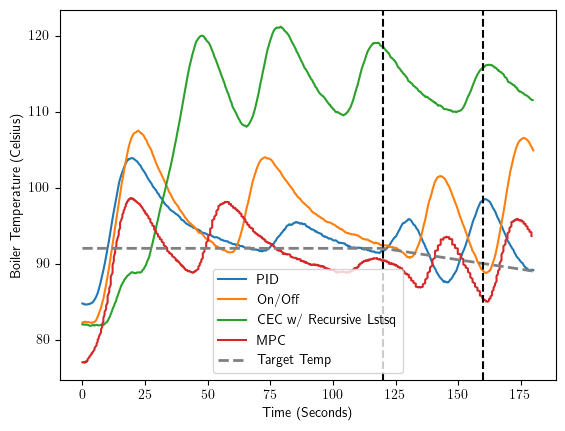

In [12]:
# Plot original curves
plt.plot(pid_variable[:, 0], pid_variable[:, 1], label="PID")
plt.plot(oo_variable[:, 0], oo_variable[:, 1], label="On/Off")
plt.plot(miac_variable[:, 0], miac_variable[:, 1], label="CEC w/ Recursive Lstsq")
plt.plot(mpc_variable[:, 0], mpc_variable[:, 1], label="MPC")

# Generate the target temperature array
time = np.arange(0, 181, 1)  # Assuming your data goes up to 180 seconds
target_temp = np.where(time <= 120, 92, 92 - 1/20 * (time - 120))

# Plot the target temperature
plt.plot(time, target_temp, linestyle='--', linewidth=2, color='gray', label="Target Temp")

# Vertical lines at 120 and 160
plt.axvline(120, linestyle='--', color='black')
plt.axvline(160, linestyle='--', color='black')

# Labels and legend
plt.xlabel('Time (Seconds)')
plt.ylabel('Boiler Temperature (Celsius)')
plt.legend()

# Save to file
plt.savefig('variable-temp.pdf')

In [60]:
160*4

640

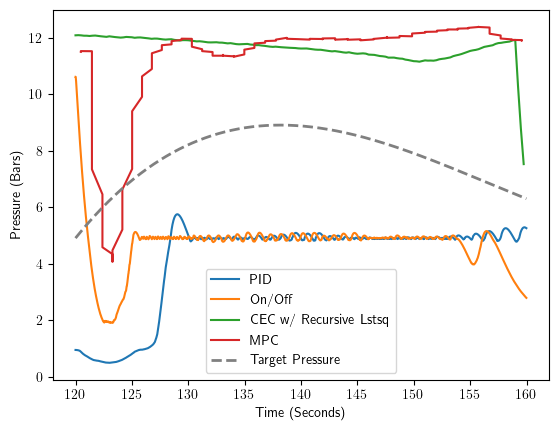

In [13]:
# Your original data ranges
start, end = 7200, 9600

# Generate the time array and target pressure array
time = np.arange(0, 40, 0.01)  # Assuming your data is sampled every second
target_pressure = (1/6000)*time**3 - (1/55)*(time-15)**2 - (1/20)*time + 9

# Plot the data
plt.plot(pid_variable[start:end, 0], pid_variable[start:end, 2], label="PID")
plt.plot(oo_variable[start:end, 0], oo_variable[start:end, 2], label="On/Off")
plt.plot(miac_variable[480:640, 0], miac_variable[480:640, 2], label="CEC w/ Recursive Lstsq")
plt.plot(mpc_variable[480:640, 0], mpc_variable[480:640, 2], label="MPC")

# Plot the target pressure
plt.plot(time + 120, target_pressure, linestyle='--', linewidth=2, color='gray', label="Target Pressure")

# Labels and legend
plt.xlabel('Time (Seconds)')
plt.ylabel('Pressure (Bars)')
plt.legend()

# Save to file
plt.savefig('variable-press.pdf')

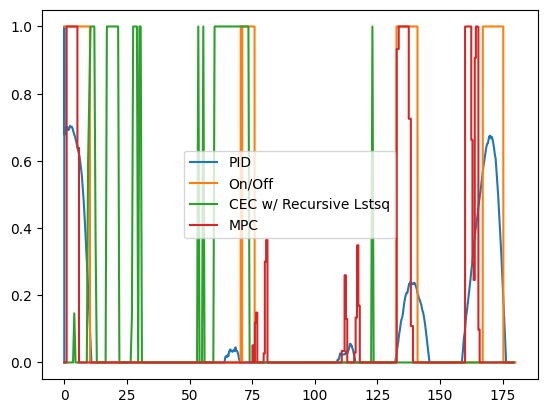

In [50]:
plt.plot(pid_fixed[:, 0], pid_fixed[:, 3], label="PID")
plt.plot(oo_fixed[:, 0], oo_fixed[:, 3], label="On/Off")
plt.plot(miac_fixed[:, 0], miac_fixed[:, 3], label="CEC w/ Recursive Lstsq")
plt.plot(mpc_fixed[:, 0], mpc_fixed[:, 3], label="MPC")
plt.legend()
plt.show()

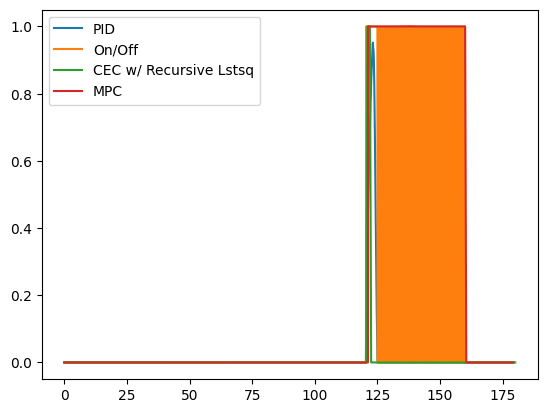

In [51]:
plt.plot(pid_fixed[:, 0], pid_fixed[:, 4], label="PID")
plt.plot(oo_fixed[:, 0], oo_fixed[:, 4], label="On/Off")
plt.plot(miac_fixed[:, 0], miac_fixed[:, 4], label="CEC w/ Recursive Lstsq")
plt.plot(mpc_fixed[:, 0], mpc_fixed[:, 4], label="MPC")
plt.legend()
plt.show()

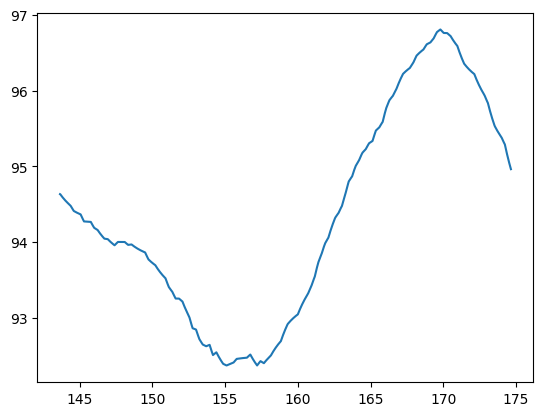

In [34]:
plt.plot(recent_data[pump_on:pump_off, 0], recent_data[pump_on:pump_off, 1])
plt.show()